In [24]:
from pymongo import MongoClient, IndexModel, ASCENDING
from tqdm import tqdm
import json
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
client = MongoClient()

In [3]:
db = client['test']

In [4]:
# collections = ['beacondetections']

In [5]:
collections = [x for x in db.collection_names() if x.startswith('beacon') and x != 'beacondetectionsweek5to7']

for c  in collections:
    print('===   {}  ==='.format(c))
    print('min timestamp {}'.format(db[c].find_one(sort=[('time', 1)])['time']))
    print('max timestamp {}\n'.format(db[c].find_one(sort=[('time', -1)])['time']))
    

In [11]:
import dateutil.parser
x = db['beacondetections'].find({"$or": [
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-24T10:06:34+00:00"), 
       "$lt": dateutil.parser.parse("2016-11-24T12:07:04.596158+00:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-24T18:08:36.384616+00:00"), 
       "$lt": dateutil.parser.parse("2016-11-24T20:09:06.980772+00:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-25T08:12:10.557688+00:00"), 
       "$lt": dateutil.parser.parse("2016-11-25T19:14:58.836541+00:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-27T08:24:24.865383+00:00"), 
       "$lt": dateutil.parser.parse("2016-11-27T16:26:27.249997+00:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-28T09:30:47.317308+00:00"), 
       "$lt": dateutil.parser.parse("2016-11-28T18:33:05+00:00")
    }
    }
    ]
    }).limit(100)




In [44]:
d = [
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-24T10:06:34+11:00"), 
       "$lt": dateutil.parser.parse("2016-11-24T12:07:04.596158+11:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-24T18:08:36.384616+11:00"), 
       "$lt": dateutil.parser.parse("2016-11-24T20:09:06.980772+11:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-25T08:12:10.557688+11:00"), 
       "$lt": dateutil.parser.parse("2016-11-25T19:14:58.836541+11:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-27T08:24:24.865383+11:00"), 
       "$lt": dateutil.parser.parse("2016-11-27T16:26:27.249997+11:00")
    }},
    { "time": {
       "$gte": dateutil.parser.parse("2016-11-28T09:30:47.317308+11:00"), 
       "$lt": dateutil.parser.parse("2016-11-28T18:33:05+11:00")
    }
    }
    ]

In [45]:
query = []
for i in d:
    for v in i.values():
        q = {}
        t = {}
        q["time"] = t
        for key, value in v.items():
            t[key] = {'$date': round(unix_time_millis(value))}
            query.append(q)
print(query)
#             print(f"{key}, {round(unix_time_millis(value))}\n")

[{'time': {'$gte': {'$date': 1479942394000}, '$lt': {'$date': 1479949624596}}}, {'time': {'$gte': {'$date': 1479942394000}, '$lt': {'$date': 1479949624596}}}, {'time': {'$gte': {'$date': 1479971316385}, '$lt': {'$date': 1479978546981}}}, {'time': {'$gte': {'$date': 1479971316385}, '$lt': {'$date': 1479978546981}}}, {'time': {'$gte': {'$date': 1480021930558}, '$lt': {'$date': 1480061698837}}}, {'time': {'$gte': {'$date': 1480021930558}, '$lt': {'$date': 1480061698837}}}, {'time': {'$gte': {'$date': 1480195464865}, '$lt': {'$date': 1480224387250}}}, {'time': {'$gte': {'$date': 1480195464865}, '$lt': {'$date': 1480224387250}}}, {'time': {'$gte': {'$date': 1480285847317}, '$lt': {'$date': 1480318385000}}}, {'time': {'$gte': {'$date': 1480285847317}, '$lt': {'$date': 1480318385000}}}]


In [34]:
epoch = datetime.datetime.utcfromtimestamp(0)
epoch = pytz.utc.localize(epoch)
def unix_time_millis(dt):
    return (dt - epoch).total_seconds() * 1000

In [31]:
dateutil.parser.parse("2016-11-28T09:30:47.317308+00:00")

datetime.datetime(2016, 11, 28, 9, 30, 47, 317308, tzinfo=tzutc())

In [35]:
epoch

datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>)

In [12]:
def stream_json(query):
    ''' call to turn a query in into a json stream.
    '''
    query_iter = query.__iter__()
    try:
        prev_result = next(query_iter)
    except StopIteration as e:
        yield '[]'
        raise e

    yield '[\n'

    for result in query_iter:
        yield json.dumps(prev_result) + ','
        prev_result = result

    yield json.dumps(prev_result) + ']\n'


In [13]:
import pandas as pd

In [14]:
# b = [i for i in tqdm(x)]

In [16]:
with open('file.json', 'w') as f:
    json.dump('[\n', f)
    for i in tqdm(x):
        json.dump(i, f)
        f.write(',')
    json.dump('\n]', f)

0it [00:00, ?it/s]


TypeError: Object of type 'datetime' is not JSON serializable

In [6]:
a = pd.read_csv('training.csv')

In [7]:
a.head()

,minor,uuid,time,rssi,agentId
0,288,17520757a1412b175c03687a7102a104,2016-11-23T23:06:34.012Z,-72,000000007d418b7a
1,288,17520757a1412b175c03687a7102a104,2016-11-23T23:06:34.019Z,-82,00000000029d74c5
2,360,17520757a1412b175c03687a7102a104,2016-11-23T23:06:34.059Z,-96,00000000c7ce4c76
3,360,17520757a1412b175c03687a7102a104,2016-11-23T23:06:34.061Z,-75,000000005e6ed248
4,360,17520757a1412b175c03687a7102a104,2016-11-23T23:06:34.061Z,-87,00000000fc7843f8


In [15]:
a.iloc[100000]

minor                                    86
uuid       17520757a1412b175c03687a7102a104
time               2016-11-23T23:09:14.270Z
rssi                                    -83
agentId                    0000000081d28129
Name: 100000, dtype: object

In [18]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70949512 entries, 0 to 70949511
Data columns (total 5 columns):
minor      int64
uuid       object
time       object
rssi       int64
agentId    object
dtypes: int64(2), object(3)
memory usage: 2.6+ GB


In [16]:
a.columns

Index(['minor', 'uuid', 'time', 'rssi', 'agentId'], dtype='object')

In [17]:
a.minor.unique()

array([  288,   360,    23,   404,   294,   377,    18,   371,   386,
         388,   402,   296,   304,   370,   357,     5,     3,   100,
         384,   406,   393,   407,   130,   369,     7,   372,   256,
         385,   400,   375,   405,   116,    72,   401,   153,   358,
          32,   131,   368,    39,    86,   390,   409,    84,   361,
          82,   387,   354,   403,   374,   359,   355,   392,   353,
         275,    50,   295,   152,   391,   120, 21504,   145, 34816,
         114, 29184], dtype=int64)

In [19]:
len(a.minor.unique())

65

In [20]:
a.agentId.unique()

array(['000000007d418b7a', '00000000029d74c5', '00000000c7ce4c76',
       '000000005e6ed248', '00000000fc7843f8', '00000000b648975e',
       '00000000035d7102', '000000001ec6ed41', '0000000031f984ad',
       '00000000b9cf80e3', '00000000b571f8e3', '000000002c4ab387',
       '0000000063a52908', '000000005de72066', '000000002f9f3fae',
       '000000004ff7d75b', '0000000023e614ba', '0000000044bfba76',
       '00000000e9753ecb', '0000000090560630', '0000000081d28129',
       '000000000b41629a', '0000000084e99283', '0000000013bed9f7',
       '00000000c6134299', '00000000449f65df', '0000000018550a76',
       '00000000733c80c0', '000000003d6e520a', '000000001b1b0d2c',
       '00000000fe8992e8', '000000001b31f3ec', '0000000097ad1922',
       '000000001159bb8a', '000000006c1a3b5a', '00000000cdfeb599',
       '00000000b6672df6', '000000004cb3ff60', '0000000020294bbd',
       '000000004ae99a8b', '0000000000d80090', '00000000fe55db18'], dtype=object)

In [21]:
a.uuid.unique()

array(['17520757a1412b175c03687a7102a104'], dtype=object)

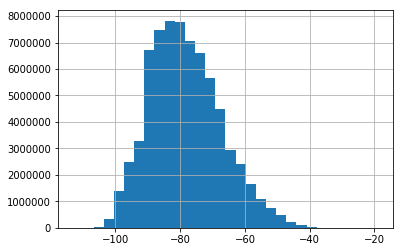

In [25]:
a.rssi.hist(bins=30)